In [1]:
import pandas
data=pandas.read_csv('cluster clothing.csv')

In [2]:
data.shape

(73, 7)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Trendy       73 non-null     int64 
 1   Styling      73 non-null     int64 
 2   Reliability  73 non-null     int64 
 3   Range        73 non-null     int64 
 4   Performance  73 non-null     int64 
 5   Comfort      73 non-null     int64 
 6   Choice       73 non-null     object
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


In [5]:
data['Choice'].unique()

array(['Reebok', 'Nike', 'Adidas'], dtype=object)

In [6]:
Y=data['Choice']

In [7]:
X=data.drop(columns=['Choice'])

In [8]:
X.shape

(73, 6)

In [11]:
from sklearn.cluster import KMeans
mylist=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(X)
    mylist.append(model.inertia_)

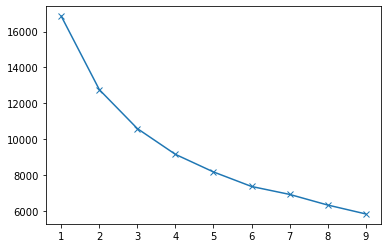

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),mylist,marker='x')
plt.show()

In [13]:
model=KMeans(n_clusters=3, random_state=500)
predicted=model.fit_predict(X)

In [14]:
predicted

array([0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 0, 0])

In [15]:
Y

0     Reebok
1     Reebok
2       Nike
3     Reebok
4     Reebok
       ...  
68      Nike
69    Adidas
70      Nike
71      Nike
72    Reebok
Name: Choice, Length: 73, dtype: object

In [16]:
Y.head()

0    Reebok
1    Reebok
2      Nike
3    Reebok
4    Reebok
Name: Choice, dtype: object

In [17]:
from sklearn.metrics import confusion_matrix

In [20]:
result={'original':Y,'pred':predicted}
clusterdf=pandas.DataFrame(result)

In [21]:
clusterdf.head(5)

,original,pred
0,Reebok,0
1,Reebok,2
2,Nike,0
3,Reebok,0
4,Reebok,0


In [22]:
clusterdf['pred'].replace(to_replace=int("2"),value="Reebok",inplace=True)
clusterdf['pred'].replace(to_replace=int("0"),value="Nike",inplace=True)
clusterdf['pred'].replace(to_replace=int("1"),value="Adidas",inplace=True)

In [23]:
clusterdf.head()

,original,pred
0,Reebok,Nike
1,Reebok,Reebok
2,Nike,Nike
3,Reebok,Nike
4,Reebok,Nike


In [24]:
confusion_matrix(clusterdf['pred'],clusterdf['original'])

array([[10,  5,  2],
       [ 2, 10,  9],
       [ 7, 20,  8]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(clusterdf['pred'],clusterdf['original'])

0.3835616438356164